Olena Kosharova, Ivan Oliinyk 50%-50%

In [1]:
import pandas as pd
import numpy as np
import warnings
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import (
    shapiro, ttest_ind, mannwhitneyu,
    chi2_contingency, levene
)
from scipy.stats import norm
from scipy.stats import ncx2

warnings.filterwarnings('ignore')

In [2]:
filename_patient = Path('..') / 'data' / 'patient.csv'
filename_station = Path('..') / 'data' / 'station.csv'
filename_observation = Path('..') / 'data' / 'observation.csv'

observation_df = pd.read_csv(filename_observation, sep='\t')
patient_df = pd.read_csv(filename_patient, sep='\t')
station_df = pd.read_csv(filename_station, sep='\t')

print("Data loaded successfully")
print(f"\nNumber of records:")
print(f"  Observation: {len(observation_df):,}")
print(f"  Patient: {len(patient_df):,}")
print(f"  Station: {len(station_df):,}")

Data loaded successfully

Number of records:
  Observation: 12,133
  Patient: 2,154
  Station: 746


# Základný opis dát spolu s ich charakteristikami

### patient.csv

In [3]:
print(f"Number of attributes: {len(patient_df.columns)}")
print(f"\nAttributes: {', '.join(patient_df.columns.tolist())}")
print(f"\nData types:")
print(patient_df.dtypes.value_counts())

Number of attributes: 13

Attributes: blood_group, user_id, company, registration, address, job, ssn, username, residence, name, current_location, mail, station_ID

Data types:
object     10
int64       2
float64     1
Name: count, dtype: int64


In [4]:
print(patient_df.info())
display(patient_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2154 entries, 0 to 2153
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   blood_group       2154 non-null   object 
 1   user_id           2154 non-null   int64  
 2   company           2154 non-null   object 
 3   registration      2154 non-null   object 
 4   address           1831 non-null   object 
 5   job               646 non-null    object 
 6   ssn               2154 non-null   object 
 7   username          2154 non-null   object 
 8   residence         0 non-null      float64
 9   name              2154 non-null   object 
 10  current_location  2046 non-null   object 
 11  mail              2154 non-null   object 
 12  station_ID        2154 non-null   int64  
dtypes: float64(1), int64(2), object(10)
memory usage: 218.9+ KB
None


,blood_group,user_id,company,registration,address,job,ssn,username,residence,name,current_location,mail,station_ID
0,B-,1384,Wulf Heinz AG,2024/06/13,Zänkerweg 6-2\r\n75317 Pößneck,NaN,079-86-6480,ilias32,NaN,Herr Pirmin Stadelmann B.A.,"(Decimal('-9.5081185'), Decimal('-108.465353'))",bruno18@gmx.de,289
1,O+,1398,Borges Moreira Ltda.,"10/11/2024, 00:00:00","Fazenda Brenda Vieira, 51\r\nPiratininga\r\n99...",NaN,84926073196,pedro-miguelvargas,NaN,Sr. Matheus Cirino,"(Decimal('38.5020005'), Decimal('151.185055'))",ana-beatrizpacheco@hotmail.com,326
2,B-,163,高橋建設有限会社,"10/19/2022, 00:00:00",島根県豊島区上高野24丁目16番6号,NaN,127-45-0018,skobayashi,NaN,中村 真綾,"(Decimal('87.3250985'), Decimal('-83.533367'))",vmaeda@yahoo.com,594
3,B+,112,Yang-Gray,2019/01/19,"93041 Wright Turnpike\r\nLake Loritown, RI 96307",NaN,765-77-3956,kochmario,NaN,Collin Wright,"(Decimal('-45.2256685'), Decimal('147.973684'))",reaton@yahoo.com,738
4,A+,92,Johnson Ltd,2019/11/10,"0089 William Run\r\nWest Adam, TX 90462",NaN,457-20-6978,paul10,NaN,Kristina Murray,"(Decimal('7.750758'), Decimal('71.027557'))",cameron61@hotmail.com,628


In [5]:
patient_df['blood_group'].unique()

array(['B-', 'O+', 'B+', 'A+', 'A-', 'AB-', 'AB+', 'O-'], dtype=object)

In [6]:
patient_df.groupby('blood_group').size()

blood_group
A+     254
A-     299
AB+    268
AB-    277
B+     256
B-     260
O+     269
O-     271
dtype: int64

### station.csv

In [7]:
print(f"Number of attributes: {len(station_df.columns)}")
print(f"\nAttributes: {', '.join(station_df.columns.tolist())}")
print(f"\nData types:")
print(station_df.dtypes.value_counts())

Number of attributes: 6

Attributes: station, longitude, location, QoS, latitude, revision

Data types:
object     4
float64    2
Name: count, dtype: int64


In [8]:
print(station_df.info())
display(station_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 746 entries, 0 to 745
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   station    746 non-null    object 
 1   longitude  746 non-null    float64
 2   location   746 non-null    object 
 3   QoS        746 non-null    object 
 4   latitude   746 non-null    float64
 5   revision   746 non-null    object 
dtypes: float64(2), object(4)
memory usage: 35.1+ KB
None


,station,longitude,location,QoS,latitude,revision
0,Kenda,86.51499,Asia/Kolkata,good,23.19590,17 Jun 2018
1,Canton,-83.48216,America/Detroit,good,42.30865,2022/10/10
2,Zaysan,84.87144,Asia/Almaty,good,47.46657,2016/11/06
3,Shushary,30.38167,Europe/Moscow,good,59.80917,2022/09/10
4,Cheraga,2.95924,Africa/Algiers,good,36.76775,07 Jan 2024


In [9]:
station_df['QoS'].unique()

array(['good', 'acceptable', 'excellent', 'maintenance'], dtype=object)

### observation.csv

In [10]:
print(f"Number of attributes: {len(observation_df.columns)}")
print(f"\nAttributes: {', '.join(observation_df.columns.tolist())}")
print(f"\nData types:")
print(observation_df.dtypes.value_counts())

Number of attributes: 23

Attributes: SpO₂, HR, PI, RR, EtCO₂, FiO₂, PRV, BP, Skin Temperature, Motion/Activity index, PVI, Hb level, SV, CO, Blood Flow Index, PPG waveform features, Signal Quality Index, Respiratory effort, O₂ extraction ratio, SNR, oximetry, latitude, longitude

Data types:
float64    23
Name: count, dtype: int64


In [11]:
print(observation_df.info())
display(observation_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12133 entries, 0 to 12132
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   SpO₂                   12133 non-null  float64
 1   HR                     12133 non-null  float64
 2   PI                     12133 non-null  float64
 3   RR                     12133 non-null  float64
 4   EtCO₂                  12133 non-null  float64
 5   FiO₂                   12133 non-null  float64
 6   PRV                    12133 non-null  float64
 7   BP                     12133 non-null  float64
 8   Skin Temperature       12133 non-null  float64
 9   Motion/Activity index  12133 non-null  float64
 10  PVI                    12133 non-null  float64
 11  Hb level               12133 non-null  float64
 12  SV                     12133 non-null  float64
 13  CO                     12133 non-null  float64
 14  Blood Flow Index       12133 non-null  float64
 15  PP

,SpO₂,HR,PI,RR,EtCO₂,FiO₂,PRV,BP,Skin Temperature,Motion/Activity index,...,CO,Blood Flow Index,PPG waveform features,Signal Quality Index,Respiratory effort,O₂ extraction ratio,SNR,oximetry,latitude,longitude
0,96.491498,75.410035,11.966950,14.781380,38.814201,60.447244,130.452955,94.990567,34.465008,8.254118,...,4.000203,80.401412,36.370500,51.040438,27.830965,0.286386,26.305034,1.0,6.84019,79.87116
1,97.657620,90.314511,9.500074,16.118786,42.528828,60.183638,106.651627,107.891610,37.058675,9.514584,...,4.073080,63.098636,26.194633,50.549199,51.169605,0.257752,28.282578,1.0,-29.29750,-51.50361
2,96.528162,79.127147,11.268005,15.921648,41.262696,77.600291,131.520657,109.497981,36.934570,10.435298,...,4.000805,47.467045,47.915005,44.390213,45.069050,0.255257,34.529833,1.0,9.33370,122.86370
3,98.195660,83.015909,14.140633,14.348950,40.283494,59.027420,144.702141,101.915115,34.855279,8.896198,...,4.003649,36.139538,51.788271,55.517932,29.478669,0.255097,36.136759,1.0,33.54428,-84.23381
4,97.573527,83.388999,9.058458,17.513347,39.844401,49.965222,111.977370,98.441554,36.833986,7.009457,...,4.004251,47.409300,86.559604,40.041646,53.128176,0.286358,23.648813,1.0,50.80019,7.20769


#### Observation a Station možno prepojiť cez GPS súradnice (latitude, longitude)
#### Patient obsahuje station_ID pre prepojenie so Station

In [12]:
numeric_cols = observation_df.select_dtypes(include=[np.number]).columns.tolist()
print(f"Number of numeric attributes: {len(numeric_cols)}")
print(f"Attributes: {numeric_cols}")

Number of numeric attributes: 23
Attributes: ['SpO₂', 'HR', 'PI', 'RR', 'EtCO₂', 'FiO₂', 'PRV', 'BP', 'Skin Temperature', 'Motion/Activity index', 'PVI', 'Hb level', 'SV', 'CO', 'Blood Flow Index', 'PPG waveform features', 'Signal Quality Index', 'Respiratory effort', 'O₂ extraction ratio', 'SNR', 'oximetry', 'latitude', 'longitude']


In [13]:
desc_stats = observation_df[numeric_cols].describe()
display(desc_stats.round(2))

,SpO₂,HR,PI,RR,EtCO₂,FiO₂,PRV,BP,Skin Temperature,Motion/Activity index,...,CO,Blood Flow Index,PPG waveform features,Signal Quality Index,Respiratory effort,O₂ extraction ratio,SNR,oximetry,latitude,longitude
count,12133.00,12133.00,12133.00,12133.00,12133.00,12133.00,12133.00,12133.00,12133.00,12133.00,...,12133.00,12133.00,12133.00,12133.00,12133.00,12133.00,12133.00,12133.00,12133.00,12133.00
mean,97.41,83.11,9.73,16.14,40.56,59.46,116.65,103.60,35.71,10.09,...,4.04,51.87,50.36,49.71,49.10,0.25,29.98,0.60,28.98,6.12
std,0.74,5.57,2.70,1.03,1.27,10.77,29.86,3.59,0.61,1.44,...,0.14,12.23,12.28,12.95,12.76,0.03,5.76,0.49,23.53,72.65
min,95.00,60.00,0.20,12.00,35.00,21.00,20.00,90.00,33.00,4.60,...,4.00,0.00,0.00,0.00,0.00,0.20,20.00,0.00,-54.80,-123.03
25%,96.83,78.81,7.92,15.45,39.72,52.25,94.31,101.19,35.31,9.14,...,4.00,43.55,41.98,40.93,40.51,0.22,24.98,0.00,16.45,-68.30
50%,97.32,82.95,9.70,16.14,40.61,59.51,121.04,103.59,35.71,10.07,...,4.00,51.95,50.40,49.62,49.27,0.25,30.06,1.00,36.22,8.87
75%,98.03,87.43,11.56,16.83,41.42,66.66,139.61,106.01,36.11,11.03,...,4.02,60.08,58.77,58.50,57.79,0.27,34.93,1.00,45.52,65.51
max,100.00,100.00,20.00,20.00,45.00,100.00,200.00,120.00,38.00,16.17,...,8.00,100.00,100.00,100.00,100.00,0.30,40.00,1.00,68.80,178.00


In [14]:
additional_stats = pd.DataFrame({
    'missing': observation_df[numeric_cols].isnull().sum(),
    'missing_%': (observation_df[numeric_cols].isnull().sum() / len(observation_df) * 100).round(2),
    'unique': observation_df[numeric_cols].nunique(),
    'skewness': observation_df[numeric_cols].skew().round(4),
    'kurtosis': observation_df[numeric_cols].kurtosis().round(4),
    'variance': observation_df[numeric_cols].var().round(4)
})

display(additional_stats)

,missing,missing_%,unique,skewness,kurtosis,variance
SpO₂,0,0.0,11954,0.1677,-0.8126,0.5489
HR,0,0.0,11954,0.0629,-0.5988,31.0689
PI,0,0.0,11954,0.0074,-0.0755,7.2805
RR,0,0.0,11954,-0.0170,-0.0061,1.0654
EtCO₂,0,0.0,11954,-0.2052,0.1150,1.6123
FiO₂,0,0.0,11954,-0.0106,0.0048,115.9496
PRV,0,0.0,11954,-0.3708,-0.6059,891.6304
BP,0,0.0,11954,0.0054,-0.0208,12.8995
Skin Temperature,0,0.0,11954,0.0118,0.0511,0.3669
Motion/Activity index,0,0.0,11954,0.0223,0.1658,2.0775


In [15]:
key_attributes = [
    'SpO₂',
    'HR',
    'RR',
    'EtCO₂',
    'FiO₂',
    'BP',
    'Skin Temperature',
    'PI',
    'PVI',
    'Signal Quality Index',
    'PRV',
    'CO'
]

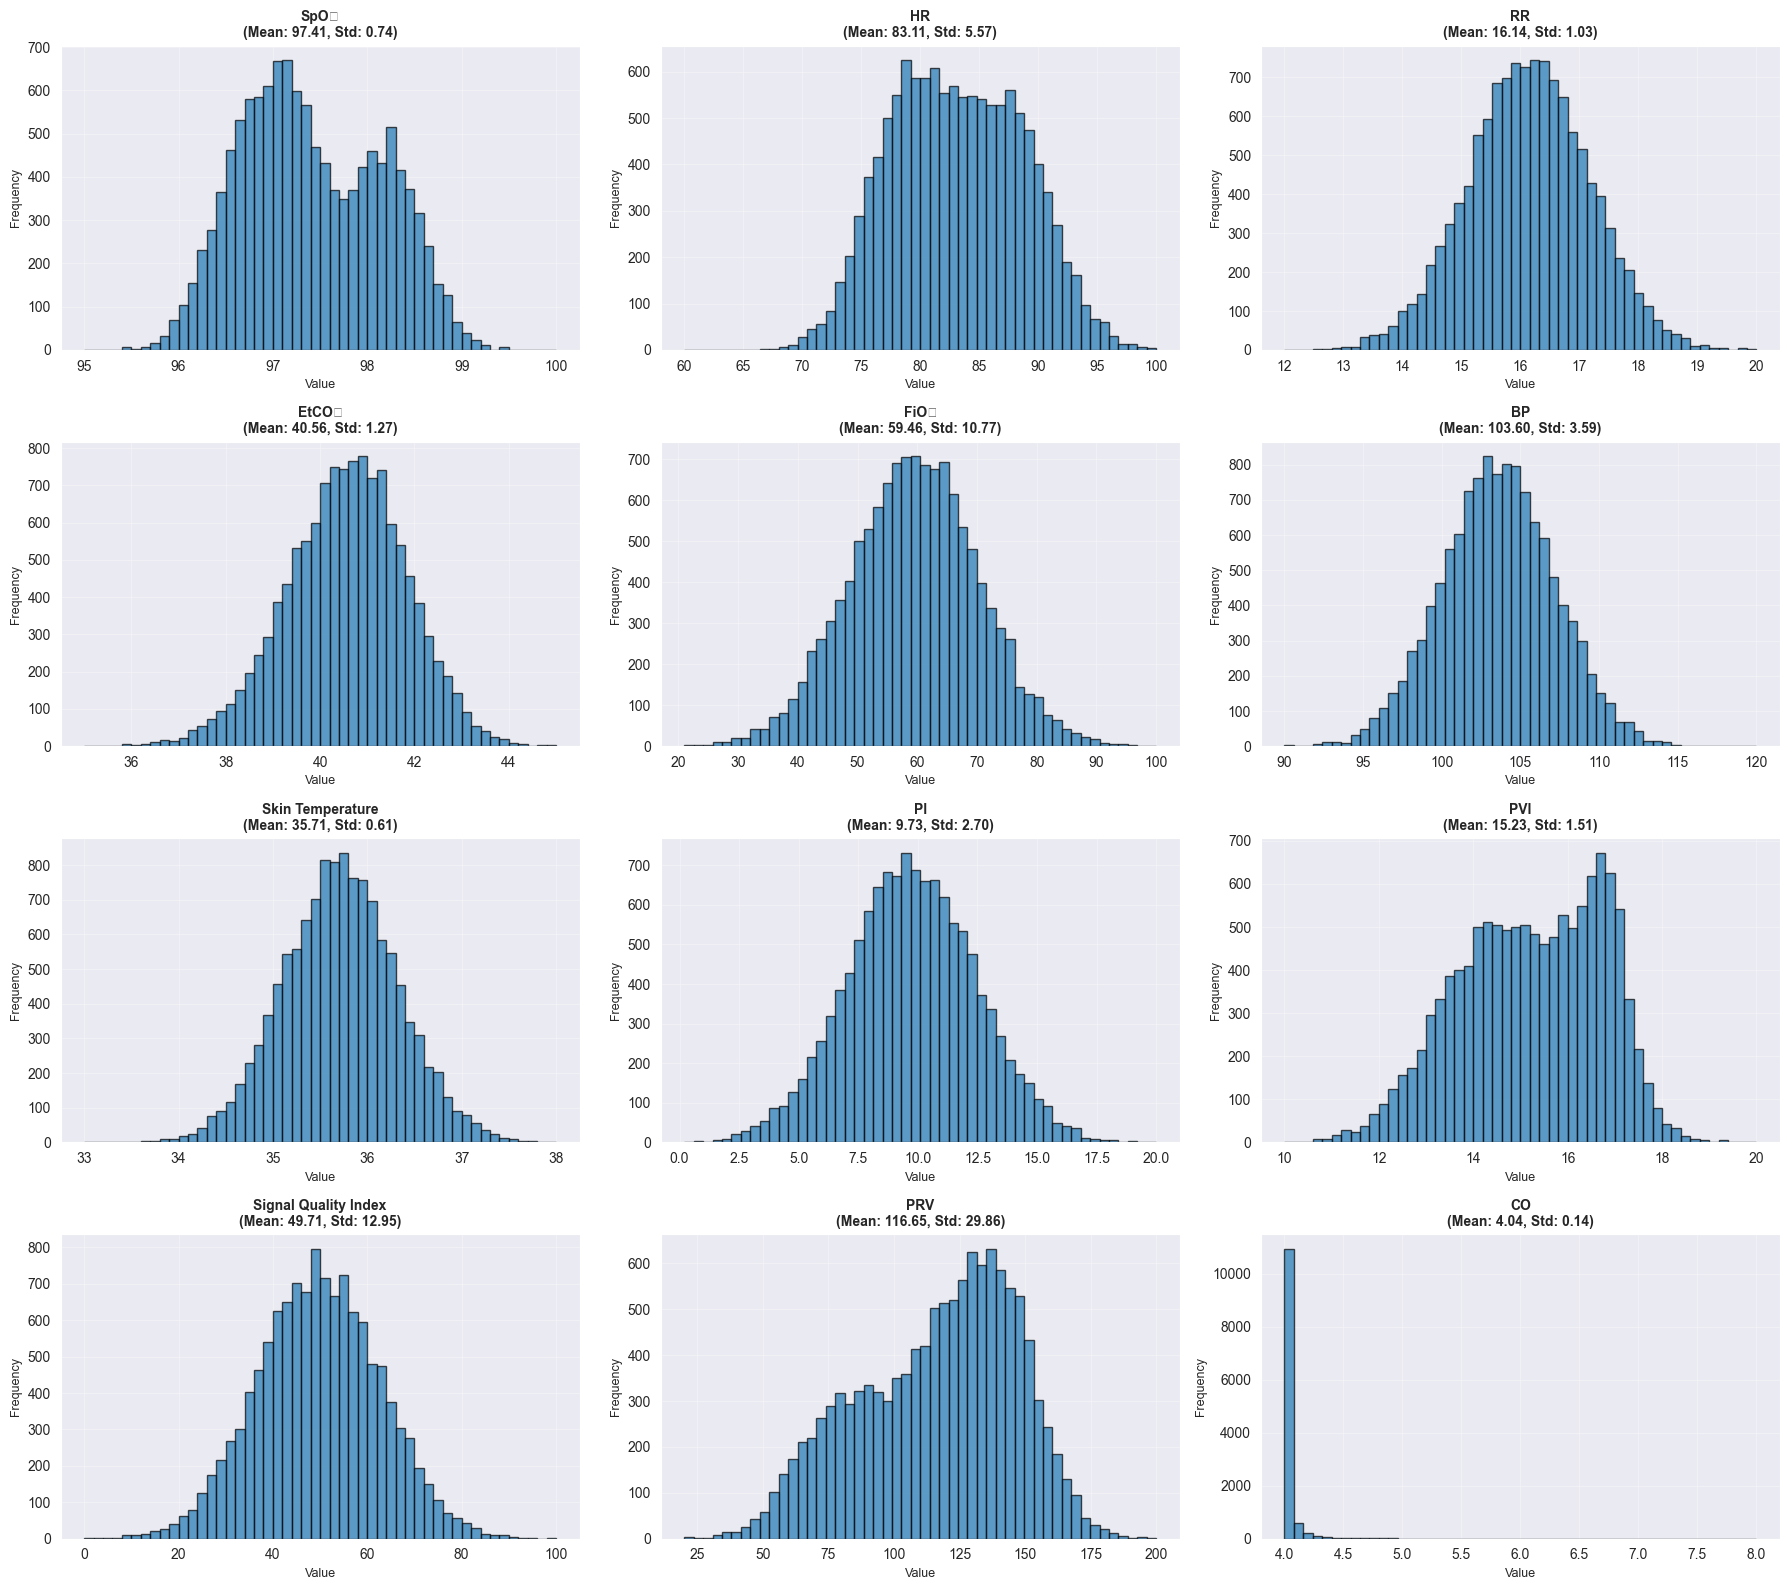

In [16]:
fig, axes = plt.subplots(4, 3, figsize=(18, 16))
axes = axes.ravel()

for idx, col in enumerate(key_attributes):
    if col in observation_df.columns:
        ax = axes[idx]

        observation_df[col].hist(bins=50, ax=ax, alpha=0.7, edgecolor='black')
        ax.set_title(f'{col}\n(Mean: {observation_df[col].mean():.2f}, Std: {observation_df[col].std():.2f})',
                     fontsize=10, fontweight='bold')
        ax.set_xlabel('Value', fontsize=9)
        ax.set_ylabel('Frequency', fontsize=9)
        ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

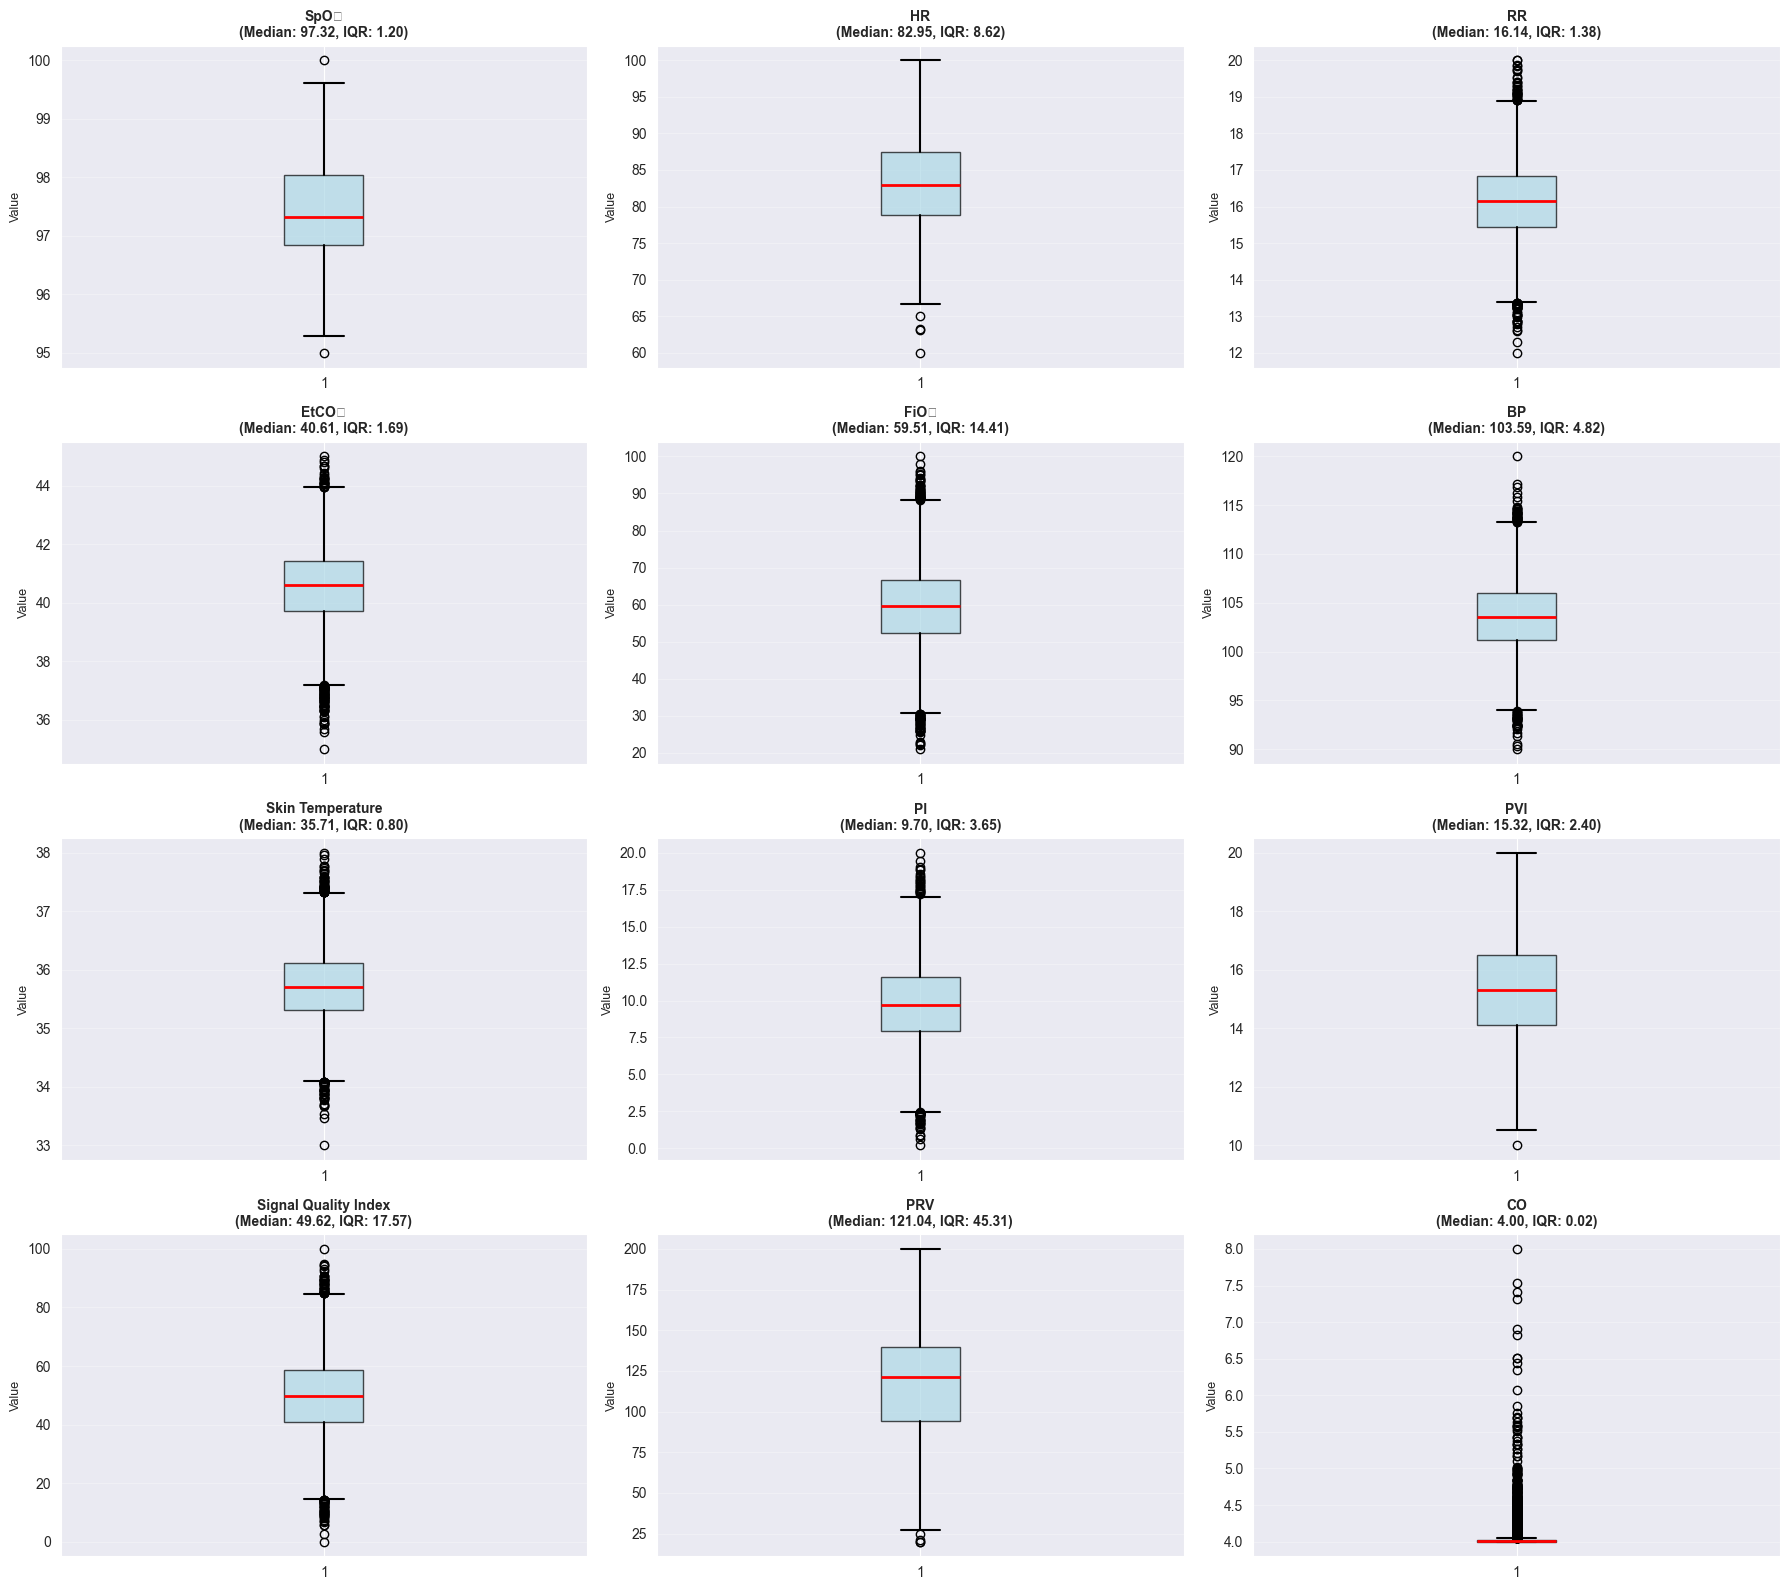

In [17]:
fig, axes = plt.subplots(4, 3, figsize=(18, 16))
axes = axes.ravel()

for idx, col in enumerate(key_attributes):
    if col in observation_df.columns:
        ax = axes[idx]

        bp = ax.boxplot(observation_df[col].dropna(), vert=True, patch_artist=True,
                        boxprops=dict(facecolor='lightblue', alpha=0.7),
                        medianprops=dict(color='red', linewidth=2),
                        whiskerprops=dict(linewidth=1.5),
                        capprops=dict(linewidth=1.5))

        q1 = observation_df[col].quantile(0.25)
        q3 = observation_df[col].quantile(0.75)
        median = observation_df[col].median()

        ax.set_title(f'{col}\n(Median: {median:.2f}, IQR: {(q3-q1):.2f})',
                     fontsize=10, fontweight='bold')
        ax.set_ylabel('Value', fontsize=9)
        ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

In [18]:
expected_ranges = {
    'SpO₂': (95, 100),
    'HR': (60, 100),
    'PI': (0.2, 20),
    'RR': (12, 20),
    'EtCO₂': (35, 45),
    'FiO₂': (21, 100),
    'PRV': (20, 200),
    'Skin Temperature': (33, 38),
    'Hb level': (12, 18),
    'CO': (4, 8),
    'SV': (60, 100),
    'PVI': (10, 20),
    'Signal Quality Index': (0, 100),
    'SNR': (20, 40)
}

results = []
for col, (low, high) in expected_ranges.items():
    if col in observation_df.columns:
        data = observation_df[col].dropna()
        below = (data < low).sum()
        above = (data > high).sum()
        total = len(data)
    else:
        below = 0
        above = 0
        total = 0
    results.append({
        "Attribute": col,
        "Range": f"{low}–{high}",
        "Below range": below,
        "Above range": above
    })

check_df = pd.DataFrame(results)
display(check_df)

,Attribute,Range,Below range,Above range
0,SpO₂,95–100,0,0
1,HR,60–100,0,0
2,PI,0.2–20,0,0
3,RR,12–20,0,0
4,EtCO₂,35–45,0,0
5,FiO₂,21–100,0,0
6,PRV,20–200,0,0
7,Skin Temperature,33–38,0,0
8,Hb level,12–18,0,0
9,CO,4–8,0,0


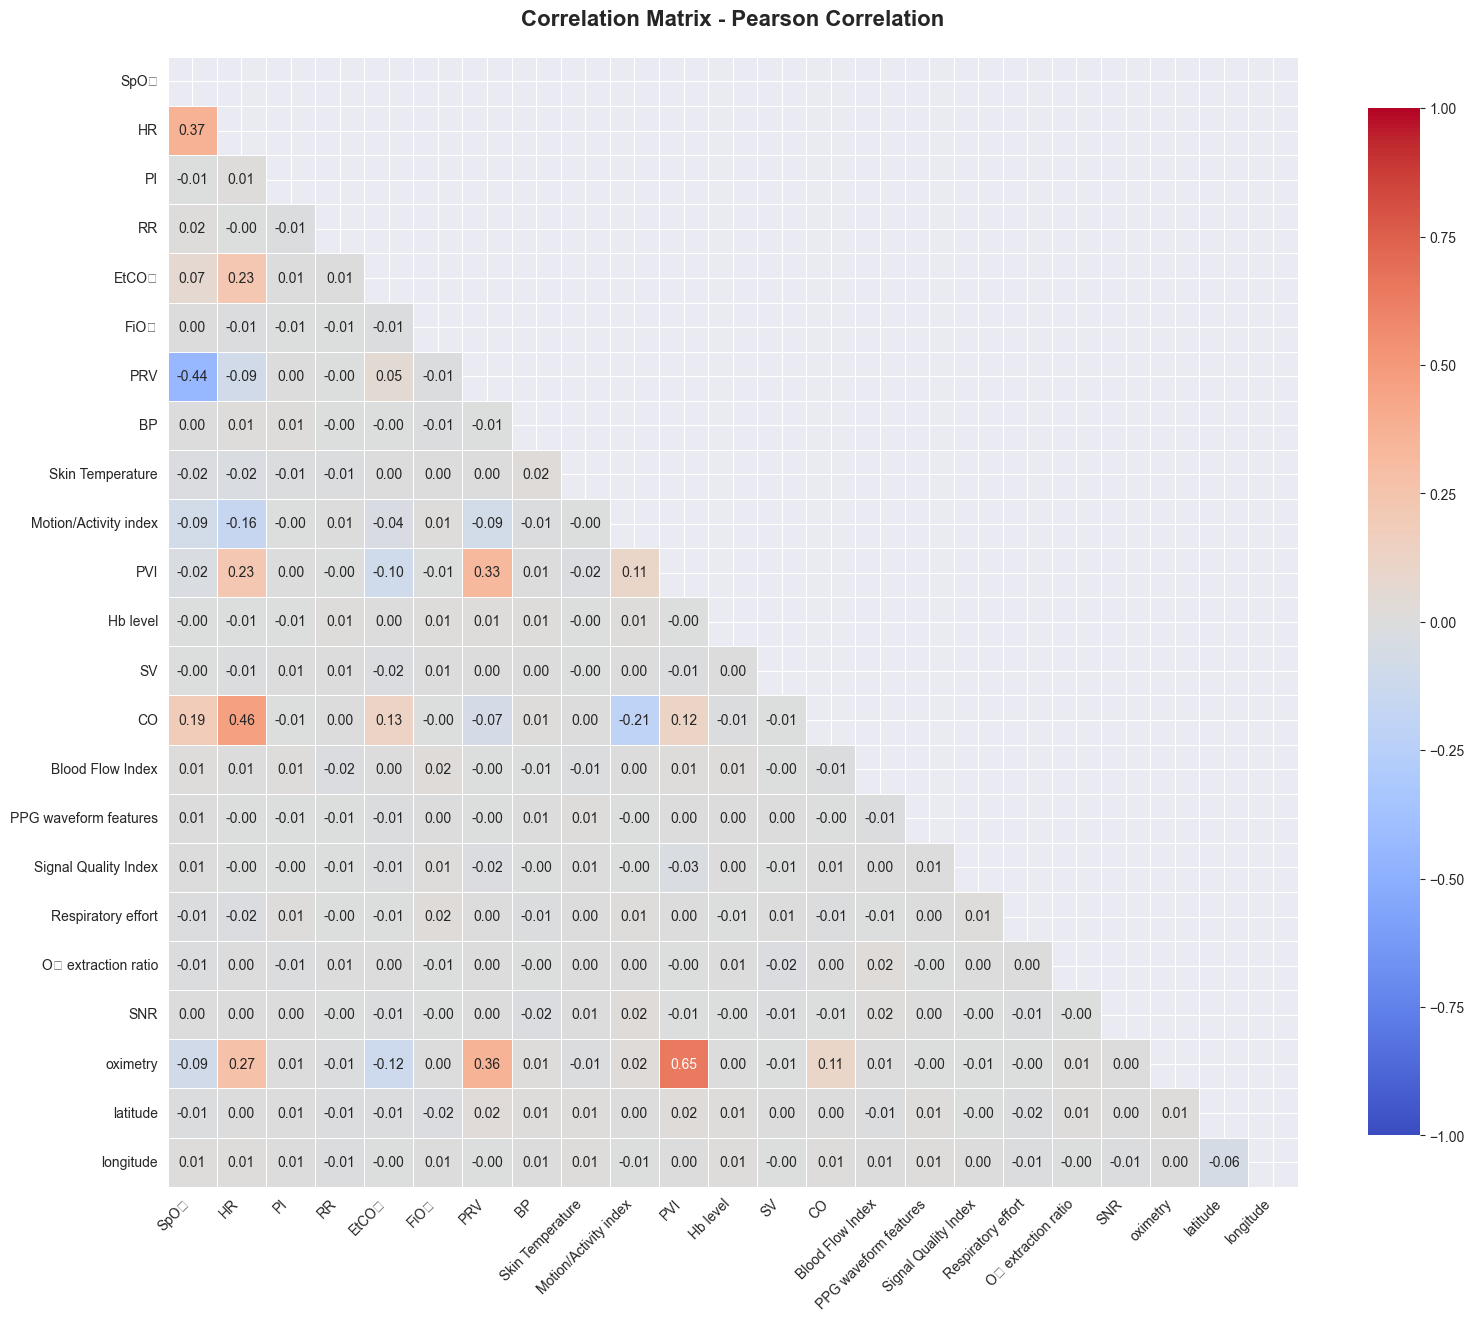

In [19]:
correlation_matrix = observation_df[numeric_cols].corr(method='pearson')

plt.figure(figsize=(16, 14))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt='.2f',
            cmap='coolwarm', center=0, vmin=-1, vmax=1,
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix - Pearson Correlation\n', fontsize=16, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [20]:
corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_pairs.append({
            'Variable 1': correlation_matrix.columns[i],
            'Variable 2': correlation_matrix.columns[j],
            'Correlation': correlation_matrix.iloc[i, j],
            'Abs_Correlation': abs(correlation_matrix.iloc[i, j])
        })

corr_df = pd.DataFrame(corr_pairs)
top_correlations = corr_df.nlargest(15, 'Abs_Correlation')

for idx, row in top_correlations.iterrows():
    print(f"{row['Variable 1']:30s}{row['Variable 2']:30s} : {row['Correlation']:7.4f}")

PVI                           oximetry                       :  0.6476
HR                            CO                             :  0.4612
SpO₂                          PRV                            : -0.4425
SpO₂                          HR                             :  0.3714
PRV                           oximetry                       :  0.3601
PRV                           PVI                            :  0.3255
HR                            oximetry                       :  0.2701
HR                            PVI                            :  0.2313
HR                            EtCO₂                          :  0.2272
Motion/Activity index         CO                             : -0.2053
SpO₂                          CO                             :  0.1915
HR                            Motion/Activity index          : -0.1572
EtCO₂                         CO                             :  0.1274
PVI                           CO                             :  0.1233
EtCO₂ 

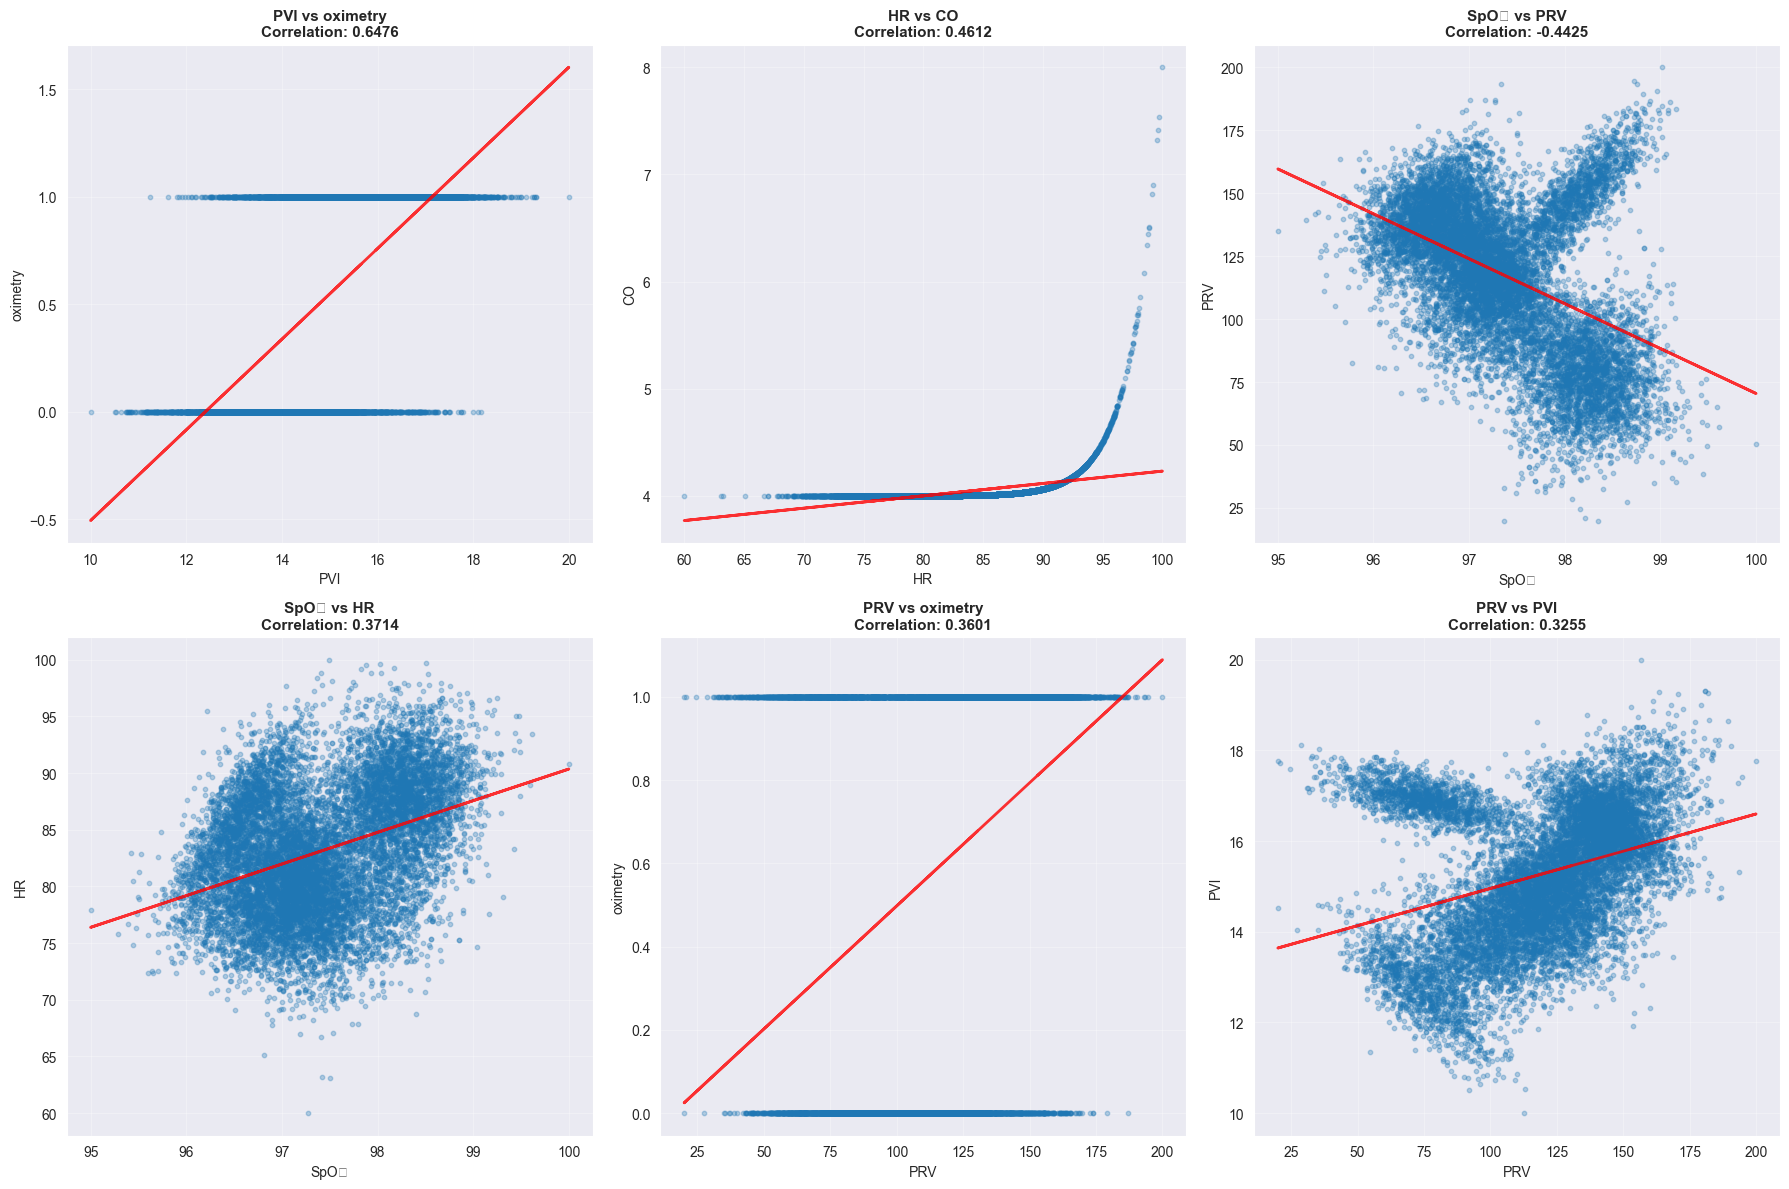

In [21]:
top_6_pairs = top_correlations.head(6)

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

for idx, (_, row) in enumerate(top_6_pairs.iterrows()):
    ax = axes[idx]
    var1, var2 = row['Variable 1'], row['Variable 2']

    ax.scatter(observation_df[var1], observation_df[var2], alpha=0.3, s=10)

    z = np.polyfit(observation_df[var1].dropna(), observation_df[var2].dropna(), 1)
    p = np.poly1d(z)
    ax.plot(observation_df[var1], p(observation_df[var1]), "r-", linewidth=2, alpha=0.8)

    ax.set_xlabel(var1, fontsize=10)
    ax.set_ylabel(var2, fontsize=10)
    ax.set_title(f'{var1} vs {var2}\nCorrelation: {row["Correlation"]:.4f}',
                 fontsize=11, fontweight='bold')
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Distribution oximetry:
oximetry
1.0    7237
0.0    4896
Name: count, dtype: int64

Class proportions:
oximetry
1.0    59.65
0.0    40.35
Name: proportion, dtype: float64


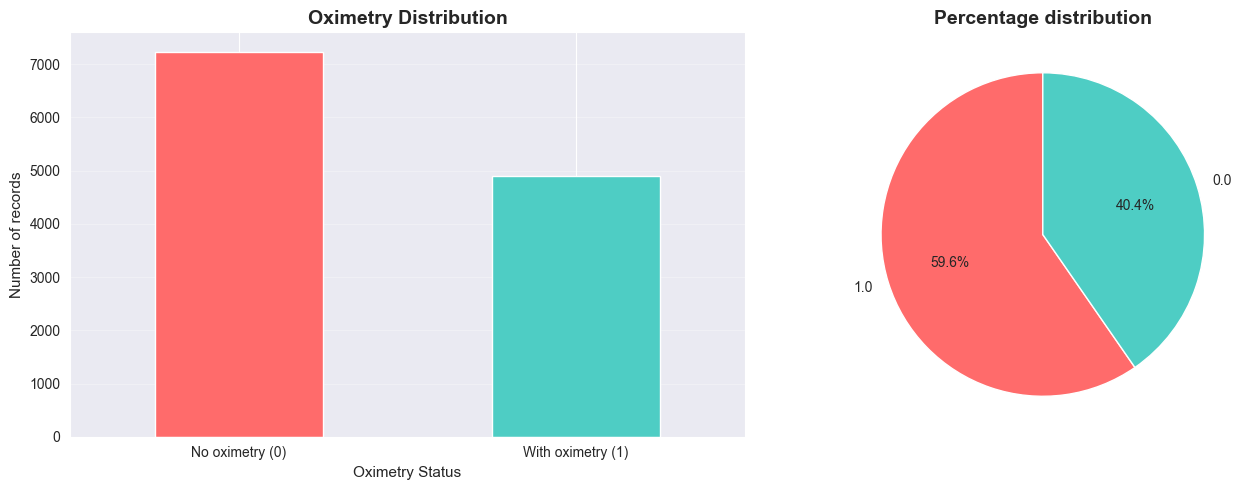

Dataset is balanced


In [22]:
print("Distribution oximetry:")
print(observation_df['oximetry'].value_counts())
print(f"\nClass proportions:")
print(observation_df['oximetry'].value_counts(normalize=True).mul(100).round(2))

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

observation_df['oximetry'].value_counts().plot(kind='bar', ax=axes[0], color=['#FF6B6B', '#4ECDC4'])
axes[0].set_title('Oximetry Distribution', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Oximetry Status', fontsize=11)
axes[0].set_ylabel('Number of records', fontsize=11)
axes[0].set_xticklabels(['No oximetry (0)', 'With oximetry (1)'], rotation=0)
axes[0].grid(True, alpha=0.3, axis='y')

observation_df['oximetry'].value_counts().plot(kind='pie', ax=axes[1], autopct='%1.1f%%',
                                               colors=['#FF6B6B', '#4ECDC4'], startangle=90)
axes[1].set_title('Percentage distribution', fontsize=14, fontweight='bold')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

print(f"Dataset {'is' if observation_df['oximetry'].value_counts().min() / observation_df['oximetry'].value_counts().max() > 0.3 else 'is not'} balanced")


Top 5 positively correlated variables:
PVI                      0.647569
PRV                      0.360077
HR                       0.270072
CO                       0.109312
Motion/Activity index    0.016665
dtype: float64

Top 5 negatively correlated variables:
EtCO₂              -0.115092
SpO₂               -0.088682
RR                 -0.010002
Skin Temperature   -0.008894
SV                 -0.007693
dtype: float64


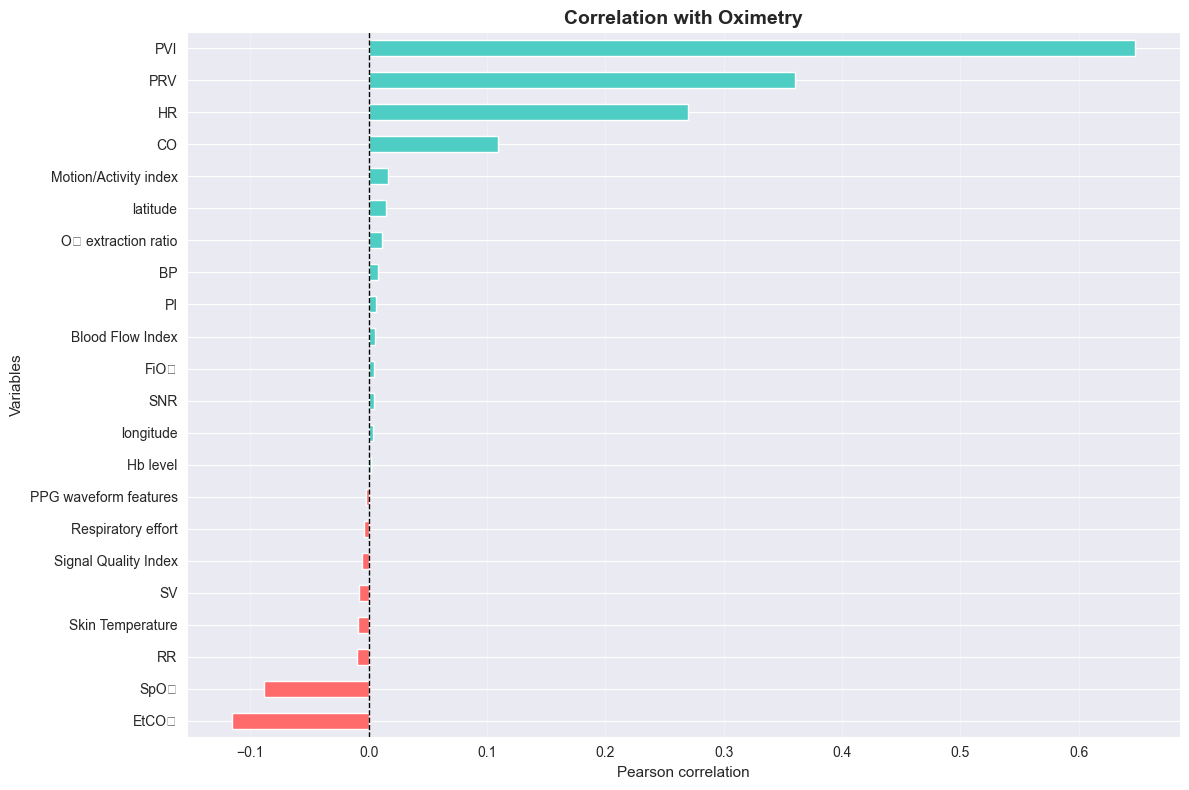

In [23]:
correlations_with_target = observation_df[numeric_cols].corrwith(observation_df['oximetry']).sort_values(ascending=False)

corr_no_target = correlations_with_target.drop('oximetry', errors='ignore')

top_pos = corr_no_target.nlargest(5)
top_neg = corr_no_target.nsmallest(5)

print("\nTop 5 positively correlated variables:")
print(top_pos)

print("\nTop 5 negatively correlated variables:")
print(top_neg)

plt.figure(figsize=(12, 8))
sorted_corr = corr_no_target.sort_values()
colors = sorted_corr.apply(lambda x: '#4ECDC4' if x > 0 else '#FF6B6B')
sorted_corr.plot(kind='barh', color=colors)

plt.title('Correlation with Oximetry', fontsize=14, fontweight='bold')
plt.xlabel('Pearson correlation', fontsize=11)
plt.ylabel('Variables', fontsize=11)
plt.axvline(x=0, color='black', linestyle='--', linewidth=1)
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

#### Identifikovali sme niekoľko silných závislostí:

- SpO a HR:   0.3714
- PRV a PVI:  0.3255
- HR a PVI:  0.2313
- HR a EtCO2:  0.2272
- Motion/Activity index a CO: -0.2053
- SpO2 a CO:  0.1915

#### Top 5 premenných s pozitívnou koreláciou s oxymetriou:
- PVI: 0.647569
- PRV: 0.360077
- HR: 0.270072
- CO: 0.109312
- Motion/Activity index: 0.016665


### Top 5 premenných s negatívnou koreláciou s oxymetriou:
- EtCO2: -0.115092
- SpO2: -0.088682
- RR: -0.010002
- Skin Temperature: -0.008894
- SV: -0.007693

#### Cieľová premenná je binárna (0/1)

#### Observation a Station možno prepojiť cez GPS súradnice (latitude, longitude)
#### Patient obsahuje station_ID pre prepojenie so Station

# Identifikácia problémov, integrácia a čistenie dát

In [24]:
patient_df['address'] = patient_df['address'].str.replace('\n', ', ').str.replace('\r', '')
patient_df.head()

,blood_group,user_id,company,registration,address,job,ssn,username,residence,name,current_location,mail,station_ID
0,B-,1384,Wulf Heinz AG,2024/06/13,"Zänkerweg 6-2, 75317 Pößneck",NaN,079-86-6480,ilias32,NaN,Herr Pirmin Stadelmann B.A.,"(Decimal('-9.5081185'), Decimal('-108.465353'))",bruno18@gmx.de,289
1,O+,1398,Borges Moreira Ltda.,"10/11/2024, 00:00:00","Fazenda Brenda Vieira, 51, Piratininga, 99724-...",NaN,84926073196,pedro-miguelvargas,NaN,Sr. Matheus Cirino,"(Decimal('38.5020005'), Decimal('151.185055'))",ana-beatrizpacheco@hotmail.com,326
2,B-,163,高橋建設有限会社,"10/19/2022, 00:00:00",島根県豊島区上高野24丁目16番6号,NaN,127-45-0018,skobayashi,NaN,中村 真綾,"(Decimal('87.3250985'), Decimal('-83.533367'))",vmaeda@yahoo.com,594
3,B+,112,Yang-Gray,2019/01/19,"93041 Wright Turnpike, Lake Loritown, RI 96307",NaN,765-77-3956,kochmario,NaN,Collin Wright,"(Decimal('-45.2256685'), Decimal('147.973684'))",reaton@yahoo.com,738
4,A+,92,Johnson Ltd,2019/11/10,"0089 William Run, West Adam, TX 90462",NaN,457-20-6978,paul10,NaN,Kristina Murray,"(Decimal('7.750758'), Decimal('71.027557'))",cameron61@hotmail.com,628


In [25]:
patient_df['registration'] = (
    patient_df['registration']
    .astype(str)
    .str.replace(',', '', regex=False)
    .str.strip()
)

patient_df['registration'] = pd.to_datetime(
    patient_df['registration'],
    errors='coerce',
    format='mixed'
)
patient_df.head()

,blood_group,user_id,company,registration,address,job,ssn,username,residence,name,current_location,mail,station_ID
0,B-,1384,Wulf Heinz AG,2024-06-13,"Zänkerweg 6-2, 75317 Pößneck",NaN,079-86-6480,ilias32,NaN,Herr Pirmin Stadelmann B.A.,"(Decimal('-9.5081185'), Decimal('-108.465353'))",bruno18@gmx.de,289
1,O+,1398,Borges Moreira Ltda.,2024-10-11,"Fazenda Brenda Vieira, 51, Piratininga, 99724-...",NaN,84926073196,pedro-miguelvargas,NaN,Sr. Matheus Cirino,"(Decimal('38.5020005'), Decimal('151.185055'))",ana-beatrizpacheco@hotmail.com,326
2,B-,163,高橋建設有限会社,2022-10-19,島根県豊島区上高野24丁目16番6号,NaN,127-45-0018,skobayashi,NaN,中村 真綾,"(Decimal('87.3250985'), Decimal('-83.533367'))",vmaeda@yahoo.com,594
3,B+,112,Yang-Gray,2019-01-19,"93041 Wright Turnpike, Lake Loritown, RI 96307",NaN,765-77-3956,kochmario,NaN,Collin Wright,"(Decimal('-45.2256685'), Decimal('147.973684'))",reaton@yahoo.com,738
4,A+,92,Johnson Ltd,2019-11-10,"0089 William Run, West Adam, TX 90462",NaN,457-20-6978,paul10,NaN,Kristina Murray,"(Decimal('7.750758'), Decimal('71.027557'))",cameron61@hotmail.com,628


In [26]:
def analyze_missing_values(df, dataset_name):
    missing = pd.DataFrame({
        'Column': df.columns,
        'Missing_Count': df.isnull().sum().values,
        'Missing_%': (df.isnull().sum().values / len(df) * 100).round(2)
    })
    missing = missing[missing['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)

    print(f"\n{dataset_name}:")
    if len(missing) == 0:
        print("No missing values")
    else:
        print(f"Total number of columns with missing values: {len(missing)}")
        display(missing)

    return missing

missing_obs = analyze_missing_values(observation_df, "Observation")
missing_pat = analyze_missing_values(patient_df, "Patient")
missing_sta = analyze_missing_values(station_df, "Station")



Observation:
No missing values

Patient:
Total number of columns with missing values: 4


,Column,Missing_Count,Missing_%
8,residence,2154,100.00
5,job,1508,70.01
4,address,323,15.00
10,current_location,108,5.01



Station:
No missing values


In [27]:
patient_df = patient_df.drop(columns=['residence'])
patient_df = patient_df.drop(columns=['job'])

In [28]:
station_df[['continent', 'city']] = station_df['location'].str.rsplit('/', n=1, expand=True)
station_df = station_df.drop(columns=['location'])
station_df.head()

,station,longitude,QoS,latitude,revision,continent,city
0,Kenda,86.51499,good,23.19590,17 Jun 2018,Asia,Kolkata
1,Canton,-83.48216,good,42.30865,2022/10/10,America,Detroit
2,Zaysan,84.87144,good,47.46657,2016/11/06,Asia,Almaty
3,Shushary,30.38167,good,59.80917,2022/09/10,Europe,Moscow
4,Cheraga,2.95924,good,36.76775,07 Jan 2024,Africa,Algiers


In [29]:
station_df['revision'] = (
    station_df['revision']
    .astype(str)
    .str.replace(',', '', regex=False)
    .str.strip()
)

station_df['revision'] = pd.to_datetime(
    station_df['revision'],
    errors='coerce',
    format='mixed'
)
station_df.head()

,station,longitude,QoS,latitude,revision,continent,city
0,Kenda,86.51499,good,23.19590,2018-06-17,Asia,Kolkata
1,Canton,-83.48216,good,42.30865,2022-10-10,America,Detroit
2,Zaysan,84.87144,good,47.46657,2016-11-06,Asia,Almaty
3,Shushary,30.38167,good,59.80917,2022-09-10,Europe,Moscow
4,Cheraga,2.95924,good,36.76775,2024-01-07,Africa,Algiers


In [30]:
print(f'Duplicates in patient: {patient_df.duplicated().sum()}')
print(f'Duplicates in observation: {observation_df.duplicated().sum()}')
print(f'Duplicates in station: {station_df.duplicated().sum()}')

Duplicates in patient: 0
Duplicates in observation: 0
Duplicates in station: 0


In [31]:
print("Z-score method\nZ-score > 3")

z_scores = np.abs(stats.zscore(observation_df[key_attributes]))
z_threshold = 3

outliers_zscore = pd.DataFrame()
outliers_zscore_summary = []

for idx, col in enumerate(key_attributes[:-1]):
    if col in observation_df.columns:
        outliers_mask = z_scores[:, idx] > z_threshold
        n_outliers = outliers_mask.sum()
        pct_outliers = (n_outliers / len(observation_df) * 100)

        outliers_zscore_summary.append({
            'Attribute': col,
            'Num of outliers': n_outliers,
            '%': f"{pct_outliers:.2f}%"
        })

outliers_zscore_df = pd.DataFrame(outliers_zscore_summary)
display(outliers_zscore_df.round(2))


Z-score method
Z-score > 3


,Attribute,Num of outliers,%
0,SpO₂,2,0.02%
1,HR,5,0.04%
2,RR,27,0.22%
3,EtCO₂,44,0.36%
4,FiO₂,35,0.29%
5,BP,29,0.24%
6,Skin Temperature,35,0.29%
7,PI,22,0.18%
8,PVI,5,0.04%
9,Signal Quality Index,40,0.33%


In [32]:
print("IQR method")
outliers_iqr_summary = []

for col in key_attributes[:-1]:
    if col in observation_df.columns:
        Q1 = observation_df[col].quantile(0.25)
        Q3 = observation_df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers_mask = (observation_df[col] < lower_bound) | (observation_df[col] > upper_bound)
        n_outliers = outliers_mask.sum()
        pct_outliers = (n_outliers / len(observation_df) * 100)


        outliers_iqr_summary.append({
            'Attribute': col,
            'Q1': Q1,
            'Q3': Q3,
            'IQR': IQR,
            'Num of outliers': n_outliers,
            '%': f"{pct_outliers:.2f}%"
        })

outliers_iqr_df = pd.DataFrame(outliers_iqr_summary)
display(outliers_iqr_df.round(2))

IQR method


,Attribute,Q1,Q3,IQR,Num of outliers,%
0,SpO₂,96.83,98.03,1.20,2,0.02%
1,HR,78.81,87.43,8.62,4,0.03%
2,RR,15.45,16.83,1.38,79,0.65%
3,EtCO₂,39.72,41.42,1.69,105,0.87%
4,FiO₂,52.25,66.66,14.41,99,0.82%
5,BP,101.19,106.01,4.82,80,0.66%
6,Skin Temperature,35.31,36.11,0.80,103,0.85%
7,PI,7.92,11.56,3.65,62,0.51%
8,PVI,14.10,16.50,2.40,1,0.01%
9,Signal Quality Index,40.93,58.50,17.57,87,0.72%


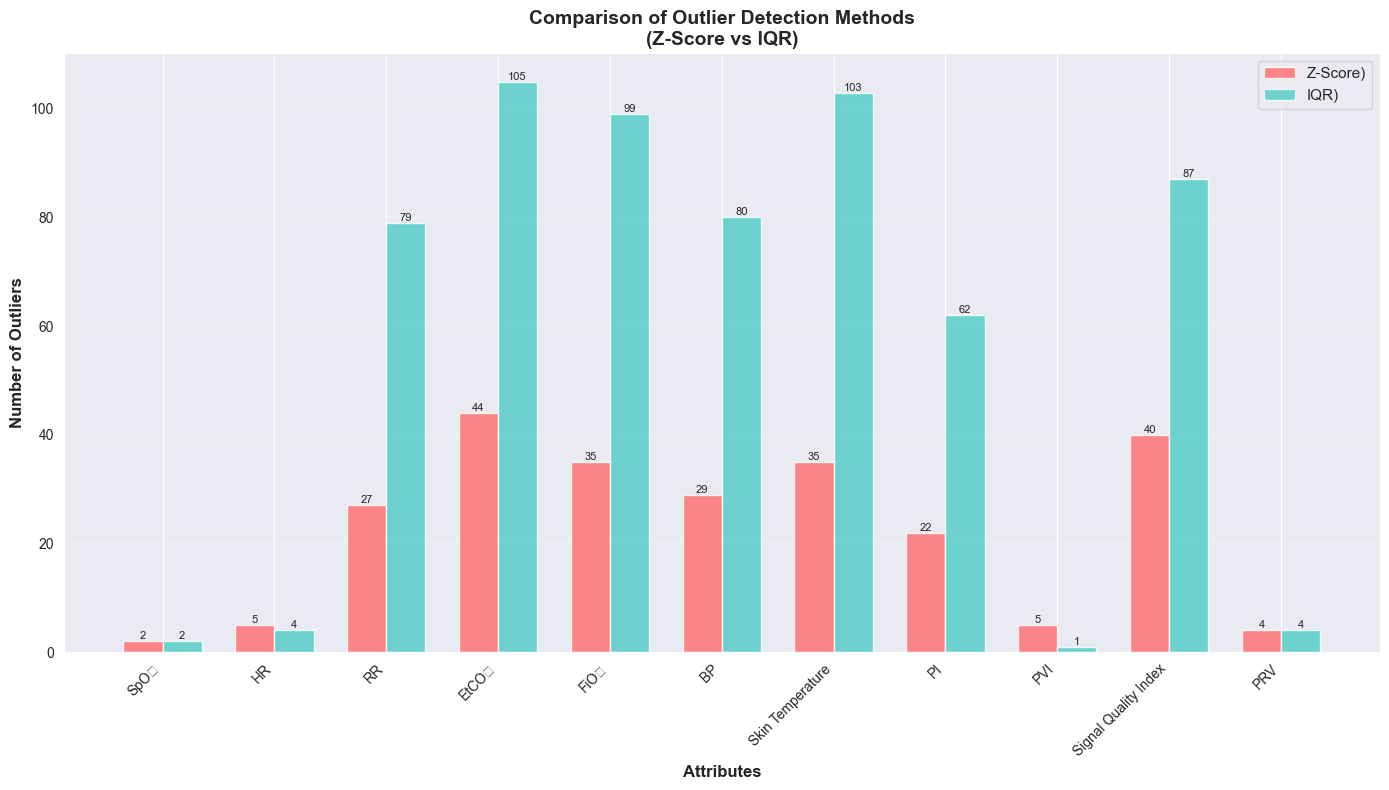

In [33]:
fig, ax = plt.subplots(figsize=(14, 8))

x = np.arange(len(key_attributes[:-1]))
width = 0.35

zscore_counts = [outliers_zscore_df[outliers_zscore_df['Attribute'] == attr]['Num of outliers'].values[0]
                 for attr in key_attributes[:-1]]
iqr_counts = [outliers_iqr_df[outliers_iqr_df['Attribute'] == attr]['Num of outliers'].values[0]
              for attr in key_attributes[:-1]]

bars1 = ax.bar(x - width/2, zscore_counts, width, label='Z-Score)', alpha=0.8, color='#FF6B6B')
bars2 = ax.bar(x + width/2, iqr_counts, width, label='IQR)', alpha=0.8, color='#4ECDC4')

ax.set_xlabel('Attributes', fontsize=12, fontweight='bold')
ax.set_ylabel('Number of Outliers', fontsize=12, fontweight='bold')
ax.set_title('Comparison of Outlier Detection Methods\n(Z-Score vs IQR)', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(key_attributes[:-1], rotation=45, ha='right')
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3, axis='y')

for bar in bars1:
    height = bar.get_height()
    if height > 0:
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height):,}', ha='center', va='bottom', fontsize=8)

for bar in bars2:
    height = bar.get_height()
    if height > 0:
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height):,}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

In [34]:
for col in key_attributes[:-1]:
    if col in observation_df.columns:
        lower_limit = observation_df[col].quantile(0.05)
        upper_limit = observation_df[col].quantile(0.95)

        observation_df[col] = np.where(
            observation_df[col] < lower_limit, lower_limit,
            np.where(observation_df[col] > upper_limit, upper_limit, observation_df[col])
        )

# Formulácia a štatistické overenie hypotéz o dátach

### Hypoteza 1

##### H0: Hb level má v priemere rovnakú hodnotu v stave s oximetriou ako bez nej.
##### H1: Hb level v priemere vyššiu hodnotu v stave s oximetriou ako bez nej.

In [35]:
group_without_ox = observation_df[observation_df['oximetry'] == 0]['Hb level'].dropna()
group_with_ox = observation_df[observation_df['oximetry'] == 1]['Hb level'].dropna()

print("Shapiro-Wilk Test:")
print("H₀: Data come from a normal distribution")
print("H₁: Data do not come from a normal distribution")

sample_size = min(5000, len(group_without_ox), len(group_with_ox))
stat_without, p_without = shapiro(group_without_ox.sample(sample_size, random_state=42))
stat_with, p_with = shapiro(group_with_ox.sample(sample_size, random_state=42))

print(f"\nWithout oximetry:")
print(f"\tTest statistic: {stat_without}")
print(f"\tP-value: {p_without}")
print(f"\tConclusion: Data {'are' if p_without > 0.05 else 'are not'} normally distributed")

print(f"\nWith oximetry:")
print(f"\tTest statistic: {stat_with}")
print(f"\tP-value: {p_with}")
print(f"\tConclusion: Data {'are' if p_with > 0.05 else 'are not'} normally distributed")


Shapiro-Wilk Test:
H₀: Data come from a normal distribution
H₁: Data do not come from a normal distribution

Without oximetry:
	Test statistic: 0.9998356525585955
	P-value: 0.9850124855312705
	Conclusion: Data are normally distributed

With oximetry:
	Test statistic: 0.9997975879608704
	P-value: 0.947829888333509
	Conclusion: Data are normally distributed


In [36]:
print("Levene’s Test:")
print("H₀: Variances of both groups are equal")
print("H₁: Variances of both groups are different")

stat_levene, p_levene = levene(group_without_ox, group_with_ox)
print(f"\nTest statistic: {stat_levene}")
print(f"P-value: {p_levene}")
print(f"Conclusion: Variances {'are' if p_levene > 0.05 else 'are not'} homogeneous")


Levene’s Test:
H₀: Variances of both groups are equal
H₁: Variances of both groups are different

Test statistic: 1.0241498351806606
P-value: 0.3115568589839169
Conclusion: Variances are homogeneous


In [37]:
if p_without > 0.05 and p_with > 0.05:
    test_type = "parametric"
else:
    test_type = "nonparametric"


if test_type == "parametric":

    print("Independent t-test:")
    print("H₀: the mean Hb level is the same in both groups")
    print("H₁: the mean Hb level is higher with oximetry")

    t_stat, p_ttest = ttest_ind(group_without_ox, group_with_ox, alternative='less')

    print(f"\nT-statistic: {t_stat:.6f}")
    print(f"P-value (one-tailed): {p_ttest:.6e}")
    print(f"Significance level α: 0.05")

    if p_ttest < 0.05:
        print(f"\nReject the H0 hypothesis (p = {p_ttest} < 0.05)")
        print("Hb level is statistically significantly higher with oximetry")
    else:
        print(f"\nDo not reject the H0 hypothesis (p = {p_ttest:} > 0.05)")
        print("There is not enough evidence that Hb level is higher with oximetry")


    cohens_d = (group_with_ox.mean() - group_without_ox.mean()) / np.sqrt(
        ((len(group_with_ox)-1)*group_with_ox.std()**2 + (len(group_without_ox)-1)*group_without_ox.std()**2) /
        (len(group_with_ox) + len(group_without_ox) - 2)
    )

    print(f"\nCohen’s d (effect size): {cohens_d}")
    if abs(cohens_d) < 0.2:
        effect = "negligible"
    elif abs(cohens_d) < 0.5:
        effect = "small"
    elif abs(cohens_d) < 0.8:
        effect = "medium"
    else:
        effect = "large"
    print(f"Effect size: {effect}")

else:
    print("\n3️Mann-whitney U test:")
    print("H₀: The distributions of Hb level are the same in both groups")
    print("H₁: Hb level tends to be higher with oximetry")

    u_stat, p_mw = mannwhitneyu(group_without_ox, group_with_ox, alternative='less')

    print(f"\nU-statistic: {u_stat}")
    print(f"P-value (one-tailed): {p_mw}")
    print(f"Significance level α: 0.05")

    if p_mw < 0.05:
        print(f"\nReject the H0 hypothesis (p = {p_mw} < 0.05)")
        print("Hb level is statistically significantly higher with oximetry")
    else:
        print(f"\nDo not reject the H0 hypothesis (p = {p_mw:} > 0.05)")
        print("There is not enough evidence that Hb level is higher with oximetry")


    n1, n2 = len(group_without_ox), len(group_with_ox)
    r_rb = 1 - (2*u_stat) / (n1 * n2)
    print(f"\nRank-biserial correlation (effect size): {r_rb:.4f}")
    if abs(r_rb) < 0.1:
        effect = "negligible"
    elif abs(r_rb) < 0.3:
        effect = "small"
    elif abs(r_rb) < 0.5:
        effect = "medium"
    else:
        effect = "large"
    print(f"Effect size: {effect}")

Independent t-test:
H₀: the mean Hb level is the same in both groups
H₁: the mean Hb level is higher with oximetry

T-statistic: -0.226904
P-value (one-tailed): 4.102513e-01
Significance level α: 0.05

Do not reject the H0 hypothesis (p = 0.4102512992641887 > 0.05)
There is not enough evidence that Hb level is higher with oximetry

Cohen’s d (effect size): 0.004198801230233445
Effect size: negligible


In [38]:
n1 = len(group_without_ox)
n2 = len(group_with_ox)
mean1 = group_without_ox.mean()
mean2 = group_with_ox.mean()
std1 = group_without_ox.std()
std2 = group_with_ox.std()

pooled_std = np.sqrt(((n1 - 1) * std1**2 + (n2 - 1) * std2**2) / (n1 + n2 - 2))

if test_type == "parametric":
    effect_size_h1 = cohens_d
else:
    effect_size_h1 = (mean2 - mean1) / pooled_std

alpha = 0.05
z_alpha = norm.ppf(1 - alpha)
se = pooled_std * np.sqrt(1/n1 + 1/n2)
power_h1 = 1 - norm.cdf(z_alpha - (mean2 - mean1) / se)

print(f"Statistical Power:")
print(f"Power = {power_h1} ({power_h1*100:.2f}%)")

if power_h1 >= 0.90:
    print("The test has high statistical power")
    print("The probability of detecting a real effect is excellent")
elif power_h1 >= 0.80:
    print("The test has significant statistical power")
    print("The probability of detecting a real effect is acceptable")
elif power_h1 >= 0.50:
    print("The test has moderate statistical power")
    print("There may be Type II errors")
else:
    print("The test has low statistical power")
    print("High risk of Type II error – a larger sample or stronger effect size may be needed")



Statistical Power:
Power = 0.07810266398691856 (7.81%)
The test has low statistical power
High risk of Type II error – a larger sample or stronger effect size may be needed


### Hypoteza 2

##### H0: QoS nemá vplyv na distribúciu oximetrie.
##### H1: QoS má signifikantný vplyv na distribúciu oximetrie.

In [39]:
observation_merged = observation_df.copy()
observation_merged['lat_round'] = observation_merged['latitude'].round(1)
observation_merged['lon_round'] = observation_merged['longitude'].round(1)

station_merged = station_df.copy()
station_merged['lat_round'] = station_merged['latitude'].round(1)
station_merged['lon_round'] = station_merged['longitude'].round(1)

merged_data = observation_merged.merge(
    station_merged[['lat_round', 'lon_round', 'QoS', 'station']],
    on=['lat_round', 'lon_round'],
    how='left'
)

In [40]:
contingency_table = pd.crosstab(
    merged_data['QoS'],
    merged_data['oximetry'],
    margins=True,
    margins_name='TOTAL'
)

contingency_table.columns = ['Without oximetry (0)', 'With oximetry (1)', 'Total']
display(contingency_table)

,Without oximetry (0),With oximetry (1),Total
QoS,,,
acceptable,1467,2172,3639
excellent,2168,3209,5377
good,4530,6714,11244
maintenance,565,882,1447
TOTAL,8730,12977,21707


In [41]:
print("Chi-square Test")
print("H₀: QoS and Oximetry are independent")
print("H₁: QoS and Oximetry are dependent")

chi2_stat, p_chi2, dof, expected = chi2_contingency(
    contingency_table.iloc[:-1, :-1]
)

print(f"\nChi-square statistic: {chi2_stat}")
print(f"Degrees of freedom: {dof}")
print(f"P-value: {p_chi2}")
print(f"Significance level α: 0.05")


if p_chi2 < 0.05:
    print(f"\nReject the H0 hypothesis (p = {p_chi2} < 0.05)")
    print("QoS and Oximetry are statistically significantly dependent")
    print("Station quality has an effect on the distribution of oximetry")
else:
    print(f"\nDo not reject the H0 hypothesis (p = {p_chi2} > 0.05)")
    print("There is not enough evidence of dependence between QoS and Oximetry")

n = contingency_table.iloc[:-1, :-1].sum().sum()
cramers_v = np.sqrt(chi2_stat / (n * (min(contingency_table.shape) - 2)))

print(f"\nCramer's V (effect size): {cramers_v:.4f}")
if cramers_v < 0.1:
    effect = "negligible"
elif cramers_v < 0.3:
    effect = "small"
elif cramers_v < 0.5:
    effect = "medium"
else:
    effect = "large"
print(f"Effect size: {effect}")


Chi-square Test
H₀: QoS and Oximetry are independent
H₁: QoS and Oximetry are dependent

Chi-square statistic: 0.8862129890751845
Degrees of freedom: 3
P-value: 0.828753593153798
Significance level α: 0.05

Do not reject the H0 hypothesis (p = 0.828753593153798 > 0.05)
There is not enough evidence of dependence between QoS and Oximetry

Cramer's V (effect size): 0.0064
Effect size: negligible


In [43]:
n_h2 = len(merged_data)
w = cramers_v

lambda_param = n_h2 * w**2
chi2_critical = stats.chi2.ppf(1 - alpha, dof)

power_h2 = 1 - ncx2.cdf(chi2_critical, dof, lambda_param)

print(f"Statistical Power:")
print(f"Power = {power_h2} ({power_h2*100:.2f}%)")

if power_h2 >= 0.90:
    print("The test has high statistical power")
    print(" The probability of detecting an existing dependence is excellent")
elif power_h2 >= 0.80:
    print("The test has significant statistical power")
    print("The probability of detecting an existing dependency is acceptable.")
elif power_h2 >= 0.50:
    print("The test has moderate statistical power")
    print("There may be Type II errors")
else:
    print("The test has low statistical power")
    print("High risk of Type II error")

Statistical Power:
Power = 0.1075358846383182 (10.75%)
The test has low statistical power
High risk of Type II error


## Majú dáta vhodný formát pre ďalšie spracovanie?

Ano, po vykonanom čistení a transformácii sú dáta vhodné pre ďalšie spracovanie.


## Nadobúdali niektoré atribúty nekonzistentné hodnoty?

- Nadbytočné znaky v stĺpci adresy v patient
- Zmiešané formáty dátumu v stĺpcoch registration v patient, revision v station
- Chýbajúce údaje v patient
- Nevhodný formát location v station
- Outliers


## Ako riešite tieto Vami identifikované problémy?

- Z adresy v patient boli odstránené nadbytočné znaky
- Dátumy boli upravené do jedného formátu
- Stĺpce s veľkým množstvom chýbajúcich informácií boli odstránené
- Stĺpec location v station bol rozdelený na dva ďalšie continent a city
- Nahradenie outliers hraničnými hodnotami
